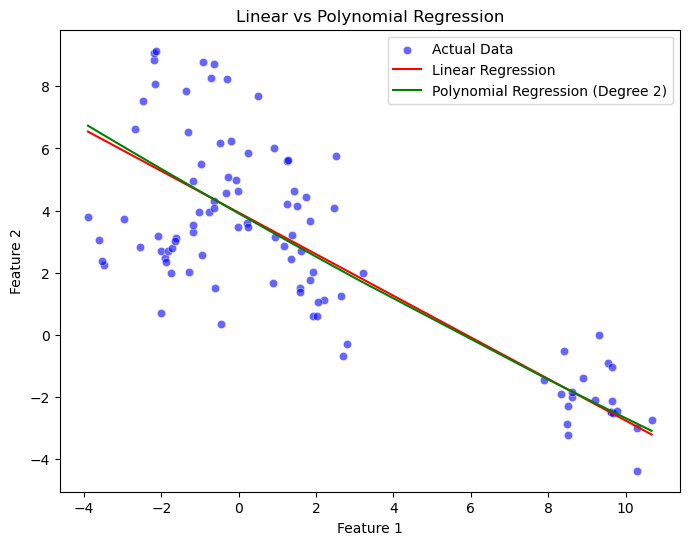

R-squared (Linear Regression): 0.589
R-squared (Polynomial Regression): 0.583


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
file_path = "C:\\Users\\vatch\\Downloads\\archive (5)\\cluster_data.csv"  # Path to your uploaded dataset
df = pd.read_csv(file_path)

# Selecting the predictor (independent variable) and target (dependent variable)
X = df[['Feature 1']]
y = df['Feature 2']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Polynomial Regression Model (Degree 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

# Calculate R-squared for both models
r2_linear = r2_score(y_test, y_pred_linear)
r2_poly = r2_score(y_test, y_pred_poly)

# Plot: Linear vs Polynomial Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['Feature 1'], y=y_test, label="Actual Data", color="blue", alpha=0.6)
sns.lineplot(x=X_test['Feature 1'], y=y_pred_linear, label="Linear Regression", color="red")
sns.lineplot(x=X_test['Feature 1'], y=y_pred_poly, label="Polynomial Regression (Degree 2)", color="green")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()

# Print R-squared values
print(f"R-squared (Linear Regression): {r2_linear:.3f}")
print(f"R-squared (Polynomial Regression): {r2_poly:.3f}")
